In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.ticker as mticker
#from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter 
import matplotlib.colors as mcolors
from scipy.stats import pearsonr 

#GeoCAT Specific packages
from geocat.viz import util as gvutil
import geocat.datafiles as gdf
from IPython.display import IFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from psif_func import plot_seasonal_4
from importlib import reload
import psif_func
reload(psif_func)
import config
from psif_func import plot_diff_3 
from psif_func import plot_seasonal_runoff
from psif_func import plot_mpas_diff_3
from psif_func import plot_ts_shp_2
from psif_func import cal_trend_huc2_1d
from psif_func import plot_trend_HUC2

In [2]:
# Kernel casper_2020

In [3]:
dir_plot = '/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/'
dir_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/'
dir_liv  = '/glade/campaign/mmm/c3we/mingge/LIVNEH/'

In [19]:
flnm_mean_liv = 'runoff_mean_1981-2005_2cesmGrid.nc'
flnm_mean_cesm = "runoff_mean_1981-2005_CESM.nc"
flnm_mean_shp_liv = 'runoff_mean_1981-2005_2cesmGrid_shp.nc'
flnm_mean_shp_cesm = "runoff_mean_1981-2005_CESM_shp.nc"
flnm_mean_shp_cesm_f = 'runoff_mean_2041-2065_CESM_shp.nc'

# 7-day running average
flnm_mean_liv_avg7 = 'runoff_mean_1981-2005_avg7_2cesmGrid.nc'
flnm_p10_liv_avg7  = 'p10_runoff_avg7_1981-2005_2cesmGrid.nc' 
flnm_p90_liv_avg7  = 'p90_runoff_avg7_1981-2005_2cesmGrid.nc'

flnm_mean_shp_liv_avg7 = 'runoff_mean_1981-2005_avg7_2cesmGrid_shp.nc'
flnm_p10_shp_liv_avg7  = 'p10_runoff_avg7_1981-2005_2cesmGrid_shp.nc' 
flnm_p90_shp_liv_avg7  = 'p90_runoff_avg7_1981-2005_2cesmGrid_shp.nc'

flnm_mean_cesm_avg7 = "runoff_avg7_mean_1981-2005_CESM.nc"
flnm_p10_cesm_avg7  = "p10_runoff_avg7_1981-2005_CESM.nc"
flnm_p90_cesm_avg7  = "p90_runoff_avg7_1981-2005_CESM.nc"

flnm_mean_shp_cesm_avg7 = "runoff_avg7_mean_1981-2005_CESM_shp.nc"
flnm_p10_shp_cesm_avg7  = "p10_runoff_avg7_1981-2005_CESM_shp.nc"
flnm_p90_shp_cesm_avg7  = "p90_runoff_avg7_1981-2005_CESM_shp.nc"

flnm_mean_cesm_avg7_f = "runoff_avg7_mean_2041-2065_CESM.nc"
flnm_p10_cesm_avg7_f  = "p10_runoff_avg7_2041-2065_CESM.nc"
flnm_p90_cesm_avg7_f  = "p90_runoff_avg7_2041-2065_CESM.nc"

flnm_mean_shp_cesm_avg7_f = "runoff_avg7_mean_2041-2065_CESM_shp.nc"
flnm_p10_shp_cesm_avg7_f  = "p10_runoff_avg7_2041-2065_CESM_shp.nc"
flnm_p90_shp_cesm_avg7_f  = "p90_runoff_avg7_2041-2065_CESM_shp.nc"


# 3-day running average
flnm_mean_liv_avg3 = 'runoff_mean_1981-2005_avg3_2cesmGrid.nc'
flnm_p10_liv_avg3  = 'p10_runoff_avg3_1981-2005_2cesmGrid.nc' 
flnm_p90_liv_avg3  = 'p90_runoff_avg3_1981-2005_2cesmGrid.nc'

flnm_mean_cesm_avg3 = "runoff_avg3_mean_1981-2005_CESM.nc"
flnm_p10_cesm_avg3  = "p10_runoff_avg3_1981-2005_CESM.nc"
flnm_p90_cesm_avg3  = "p90_runoff_avg3_1981-2005_CESM.nc"

#### Supplemental Maximum daily runoff 1981-2010 Livneh, cesm, difference 

/glade/campaign/mmm/c3we/mingge/LIVNEH/runoff_mean_1981-2005_2cesmGrid.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_1981-2005_CESM.nc


<Figure size 1152x768 with 0 Axes>

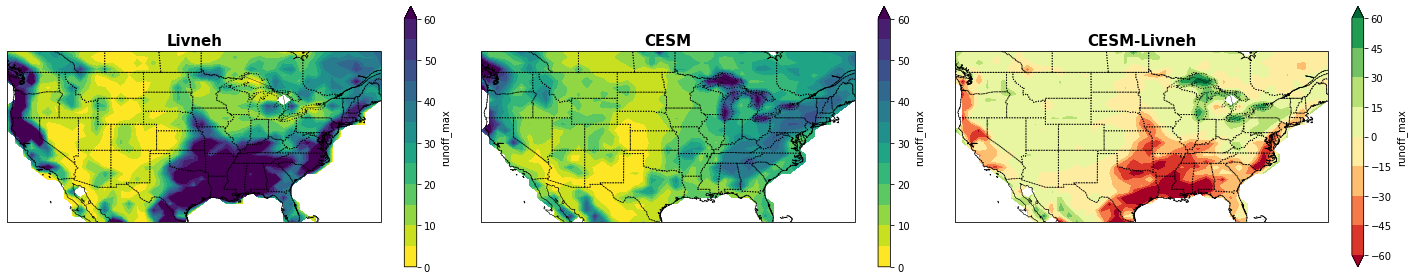

In [6]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
               print(dir_liv + flnm_mean_liv)    

with xr.open_dataset(dir_cesm + flnm_mean_cesm ) as ds_mean_cesm:
               print(dir_cesm + flnm_mean_cesm)

runoff_liv  = ds_mean_liv.runoff_max
runoff_cesm = ds_mean_cesm.runoff_max_wy_3d.mean(dim=('member'))
runoff_dif  = runoff_cesm - runoff_liv

data_3d = xr.concat([runoff_liv, runoff_cesm, runoff_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 60, num=13)
cnlevel_dif = np.linspace(-60, 60, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "runoff_liv_cesm_max.png", bbox_inches='tight');

#### Supplemental 1981-2010 Minimum daily runoff (Livneh, CESM, CESM-Livneh)

Add Livneh runoff_min
1)runoff_LIVNEH_mean.ncl
2)interp_runoff_cesm_grid.ncl

Add CESM runoff_min
1) runoff_mean_cesm.ncl

/glade/campaign/mmm/c3we/mingge/LIVNEH/runoff_mean_1981-2005_2cesmGrid.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_1981-2005_CESM.nc


<Figure size 1152x768 with 0 Axes>

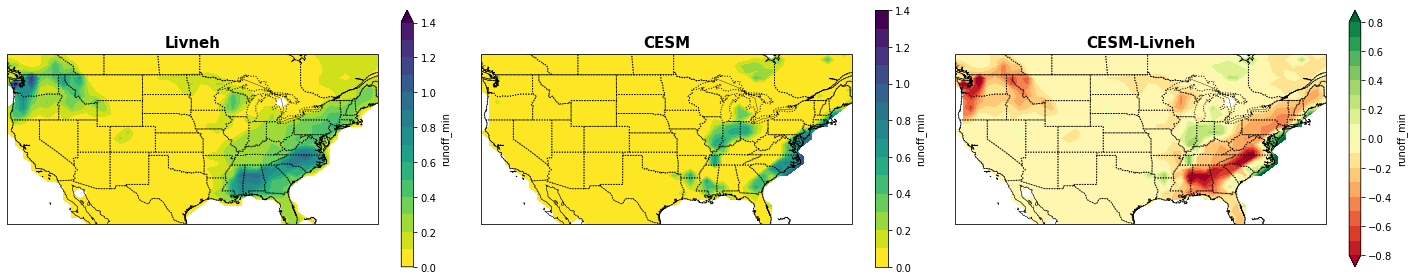

In [7]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
               print(dir_liv + flnm_mean_liv)    

with xr.open_dataset(dir_cesm + flnm_mean_cesm ) as ds_mean_cesm:
               print(dir_cesm + flnm_mean_cesm)

runoff_liv  = ds_mean_liv.runoff_min
runoff_cesm = ds_mean_cesm.runoff_min_wy_3d.mean(dim=('member'))
runoff_dif  = runoff_cesm - runoff_liv

data_3d = xr.concat([runoff_liv, runoff_cesm, runoff_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 1.4, num=15)
cnlevel_dif = np.linspace(-0.8, 0.8, num=17)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "runoff_liv_cesm_min.png", bbox_inches='tight');

### Supplemental 1981-2005 7Q10 

/glade/campaign/mmm/c3we/mingge/LIVNEH/p10_runoff_avg7_1981-2005_2cesmGrid.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p10_runoff_avg7_1981-2005_CESM.nc


<Figure size 1152x768 with 0 Axes>

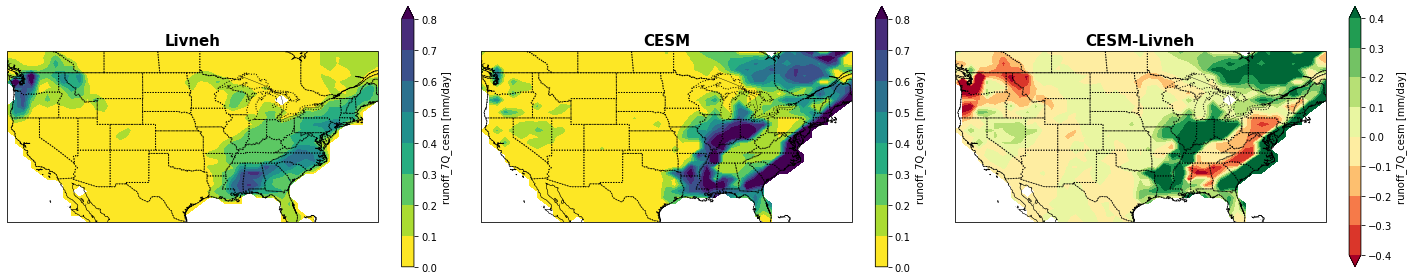

In [8]:
with xr.open_dataset(dir_liv + flnm_p10_liv_avg7) as ds_p10_liv_avg7:
               print(dir_liv + flnm_p10_liv_avg7)  


with xr.open_dataset(dir_cesm + flnm_p10_cesm_avg7) as ds_p10_cesm_avg7:
               print(dir_cesm + flnm_p10_cesm_avg7)  

runoff_liv_avg7  = ds_p10_liv_avg7.runoff_7Q_cesm
runoff_cesm_avg7 = ds_p10_cesm_avg7.runoff_7Q_3d.mean(dim=('member'))
runoff_avg7_dif = runoff_cesm_avg7 - runoff_liv_avg7

data_3d = xr.concat([runoff_liv_avg7, runoff_cesm_avg7, runoff_avg7_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 0.8, num=9)
cnlevel_dif = np.linspace(-0.4, 0.4, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "runoff_7Q10_liv_cesm_cli.png", bbox_inches='tight');

### Supplemental 1981-2005 7Q90  

/glade/campaign/mmm/c3we/mingge/LIVNEH/p90_runoff_avg7_1981-2005_2cesmGrid.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p90_runoff_avg7_1981-2005_CESM.nc


<Figure size 1152x768 with 0 Axes>

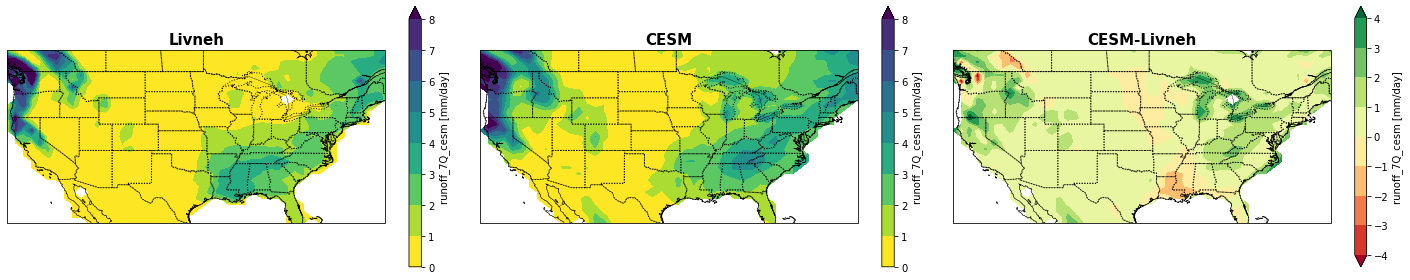

In [9]:
with xr.open_dataset(dir_liv + flnm_p90_liv_avg7) as ds_p90_liv_avg7:
               print(dir_liv + flnm_p90_liv_avg7)  


with xr.open_dataset(dir_cesm + flnm_p90_cesm_avg7) as ds_p90_cesm_avg7:
               print(dir_cesm + flnm_p90_cesm_avg7)  

runoff_liv_avg7  = ds_p90_liv_avg7.runoff_7Q_cesm
runoff_cesm_avg7 = ds_p90_cesm_avg7.runoff_7Q_3d.mean(dim=('member'))
runoff_avg7_dif = runoff_cesm_avg7 - runoff_liv_avg7

data_3d = xr.concat([runoff_liv_avg7, runoff_cesm_avg7, runoff_avg7_dif], "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 8, num=9)
cnlevel_dif = np.linspace(-4, 4, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "runoff_7Q90_liv_cesm_cli.png", bbox_inches='tight');

#### Mean monthly runoff by HUC 1981-2010 (MRT)

/glade/campaign/mmm/c3we/mingge/LIVNEH/runoff_mean_1981-2005_2cesmGrid_shp.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_1981-2005_CESM_shp.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_cesm_livneh_monthly_ts_huc2.png


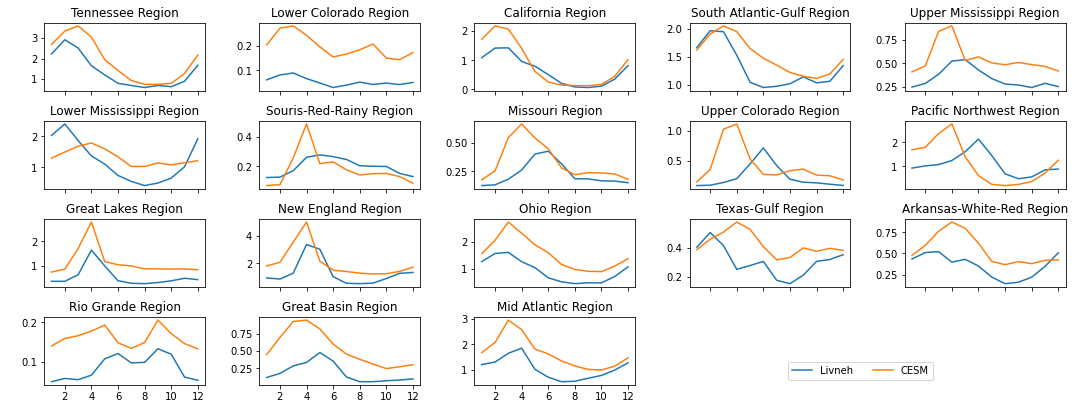

In [10]:
with xr.open_dataset(dir_liv + flnm_mean_shp_liv) as ds_mean_shp_liv:
               print(dir_liv + flnm_mean_shp_liv)    

with xr.open_dataset(dir_cesm + flnm_mean_shp_cesm ) as ds_mean_shp_cesm:
               print(dir_cesm + flnm_mean_shp_cesm)

runoff_month_liv  = ds_mean_shp_liv.runoff_month.transpose('month','shapefile_area')
runoff_month_cesm = ds_mean_shp_cesm.runoff_month_4d.mean(dim=('member')).transpose('month','shapefile_area')

# coordinates
month = range(1, 13, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
da_3d = xr.concat([runoff_month_liv, runoff_month_cesm], "none").transpose('month','shapefile_area','none')
 
# add coordinates and dimension rename
da_3d = xr.DataArray(da_3d, coords=[month, range(1,19,1), models], dims=["month", "huc2", "models"])

plot_ts_shp_2(da_3d, labels, 'month', ' ')

plt.savefig(dir_plot + "runoff_cesm_livneh_monthly_ts_huc2.png")
print(dir_plot, "runoff_cesm_livneh_monthly_ts_huc2.png")

#### Mean monthly runoff by HUC 2040-2070 relative to 1981-2010


/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_2041-2065_CESM_shp.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_1981-2005_CESM_shp.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_cesm_monthly_ts_huc2.png


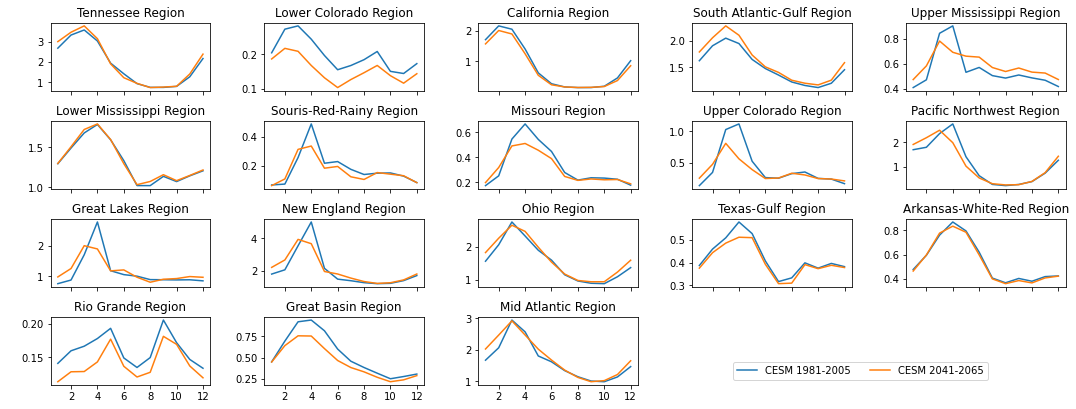

In [11]:
with xr.open_dataset(dir_cesm + flnm_mean_shp_cesm_f) as ds_mean_shp_cesm_f:
               print(dir_cesm + flnm_mean_shp_cesm_f)    

with xr.open_dataset(dir_cesm + flnm_mean_shp_cesm ) as ds_mean_shp_cesm:
               print(dir_cesm + flnm_mean_shp_cesm)

runoff_month_cesm   = ds_mean_shp_cesm.runoff_month_4d.mean(dim=('member')).transpose('month','shapefile_area')
runoff_month_cesm_f = ds_mean_shp_cesm_f.runoff_month_4d.mean(dim=('member')).transpose('month','shapefile_area')

# coordinates
month = range(1, 13, 1)
models = range(1, 3, 1)

labels=['CESM 1981-2005','CESM 2041-2065']
# concatenate xarray along a dimension 'none' and then change it to  'model'
da_3d = xr.concat([runoff_month_cesm, runoff_month_cesm_f], "none").transpose('month','shapefile_area','none')
 
# add coordinates and dimension rename
da_3d = xr.DataArray(da_3d, coords=[month, range(1,19,1), models], dims=["month", "huc2", "models"])

plot_ts_shp_2(da_3d, labels, 'month', ' ')

plt.savefig(dir_plot + "runoff_cesm_monthly_ts_huc2.png")
print(dir_plot, "runoff_cesm_monthly_ts_huc2.png") 

Working on
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/runoff_mean_1981-2005_CESM_shp.nc
create ds_mean_shp_cesm_f runoff_mean_2041-2065_CESM_shp.nc

(3) mask_runoff_cesm_byshp.ncl
   input runoff_mean_1981-2005_CESM.nc
    output runoff_mean_1981-2005_CESM_shp.nc

(2) runoff_mean_cesm.ncl
create runoff_mean_2041-2065_CESM.nc runoff_mean_1981-2005_CESM.nc

(1) runoff_cesm_daily_CONUS.ncl runoff_avg3-7_cesm.ncl
create runoff_runningAvg_2040-2065_daily_CESM.nc runoff_runningAvg_1980-2005_daily_CESM.nc

#### Percentage change 7Q90 1981-2005
(linear trend slop map over 25-year) 

Livneh add annual runoff <br>
(1) p10_runoff_liv.ncl   <br>
(2) interp_p10_runoff_cesm_grid.ncl <br>  
(3) mask_runoff_livneh_cesm_byshp.ncl

CESM <br>
(1) p10_runoff_cesm.ncl <br>
    p90_runoff_avg7_2041-2065_CESM.nc p90_runoff_avg7_1981-2005_CESM.nc

(2) mask_runoff_byshp.ncl mask_runoff_cesm_byshp.ncl
    runoff_avg7_mean_2041-2065_cesm_shp.nc
    runoff_avg7_mean_1981-2005_cesm_shp.nc


#### Livneh 

/glade/campaign/mmm/c3we/mingge/LIVNEH/p90_runoff_avg7_1981-2005_2cesmGrid_shp.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_7Q90_liv_annual_huc2_map.png


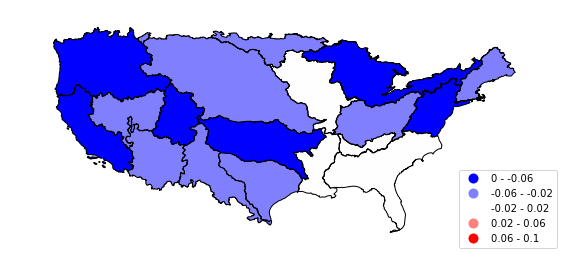

In [22]:
with xr.open_dataset(dir_liv + flnm_p90_shp_liv_avg7) as ds_7Q90_shp_liv:
               print(dir_liv + flnm_p90_shp_liv_avg7) 

runoff_7Q90_year_liv  = ds_7Q90_shp_liv.runoff_7Q_year_cesm
trend_1d = cal_trend_huc2_1d(runoff_7Q90_year_liv)

plot_trend_HUC2(trend_1d,  -0.1, 0.1, 'bwr')   
plt.savefig(dir_plot + "runoff_7Q90_liv_annual_huc2_map.png")
print(dir_plot, "runoff_7Q90_liv_annual_huc2_map.png")

#### CESM

/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p90_runoff_avg7_1981-2005_CESM_shp.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_7Q90_cesm_annual_huc2_map.png


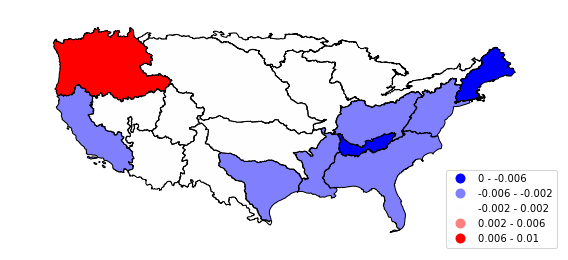

In [12]:
with xr.open_dataset(dir_cesm + flnm_p90_shp_cesm_avg7) as ds_7Q90_shp_cesm:
               print(dir_cesm + flnm_p90_shp_cesm_avg7) 

runoff_7Q90_year_cesm  = ds_7Q90_shp_cesm.runoff_7Q_year_4d.mean(dim='member').transpose('year','shapefile_area')

trend_1d = cal_trend_huc2_1d(runoff_7Q90_year_cesm)

plot_trend_HUC2(trend_1d,  -0.01, 0.01, 'bwr')   
plt.savefig(dir_plot + "runoff_7Q90_cesm_annual_huc2_map.png")
print(dir_plot, "runoff_7Q90_cesm_annual_huc2_map.png")

#### Percentage change 7Q90 2041-2065 relative to 1981-2005

/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p90_runoff_avg7_1981-2005_CESM_shp.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p90_runoff_avg7_2041-2065_CESM_shp.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_7Q90_cesm_annual_huc2_map.png


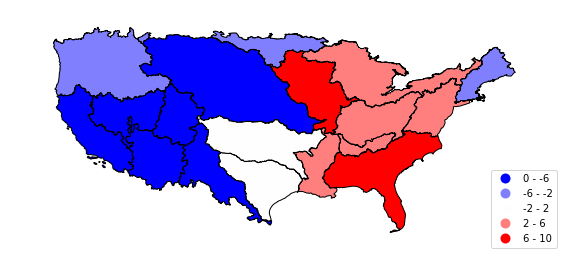

In [18]:
with xr.open_dataset(dir_cesm + flnm_p90_shp_cesm_avg7) as ds_7Q90_shp_cesm:
               print(dir_cesm + flnm_p90_shp_cesm_avg7) 

with xr.open_dataset(dir_cesm + flnm_p90_shp_cesm_avg7_f) as ds_7Q90_shp_cesm_f:
               print(dir_cesm + flnm_p90_shp_cesm_avg7_f) 

runoff_7Q90_cesm   = ds_7Q90_shp_cesm.runoff_7Q_3d.mean(dim=('member'))
runoff_7Q90_cesm_f = ds_7Q90_shp_cesm_f.runoff_7Q_3d.mean(dim=('member'))

trend_1d = (runoff_7Q90_cesm_f-runoff_7Q90_cesm)/runoff_7Q90_cesm*100

plot_trend_HUC2(trend_1d,  -10, 10, 'bwr')   
plt.savefig(dir_plot + "runoff_7Q90_cesm_diff_annual_huc2_map.png")
print(dir_plot, "runoff_7Q90_cesm_annual_huc2_map.png")

#### Percentage change 7Q10 1981-2005 
(trend slop map)

/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p10_runoff_avg7_1981-2005_CESM_shp.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_7Q10_cesm_annual_huc2_map.png


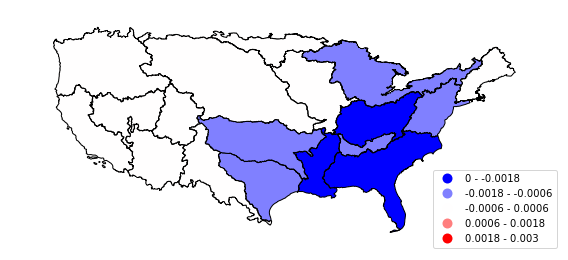

In [14]:
with xr.open_dataset(dir_cesm + flnm_p10_shp_cesm_avg7) as ds_7Q10_shp_cesm:
               print(dir_cesm + flnm_p10_shp_cesm_avg7) 

runoff_7Q10_year_cesm = ds_7Q10_shp_cesm.runoff_7Q_year_4d.mean(dim='member').transpose('year','shapefile_area')

trend_1d = cal_trend_huc2_1d(runoff_7Q10_year_cesm)

plot_trend_HUC2(trend_1d,  -0.003, 0.003, 'bwr')   
plt.savefig(dir_plot + "runoff_7Q10_cesm_annual_huc2_map.png")
print(dir_plot, "runoff_7Q10_cesm_annual_huc2_map.png")

#### Percentage change 7Q10 2041-2065 relative to 1981-2005 

/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p10_runoff_avg7_1981-2005_CESM_shp.nc
/glade/campaign/mmm/c3we/mingge/CESM/RUNOFF/p10_runoff_avg7_2041-2065_CESM_shp.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ runoff_7Q10_cesm_diff_annual_huc2_map.png


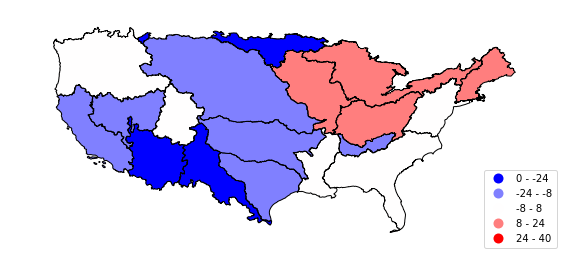

In [17]:
with xr.open_dataset(dir_cesm + flnm_p10_shp_cesm_avg7) as ds_7Q10_shp_cesm:
               print(dir_cesm + flnm_p10_shp_cesm_avg7) 

with xr.open_dataset(dir_cesm + flnm_p10_shp_cesm_avg7_f) as ds_7Q10_shp_cesm_f:
               print(dir_cesm + flnm_p10_shp_cesm_avg7_f) 

runoff_7Q10_cesm   = ds_7Q10_shp_cesm.runoff_7Q_3d.mean(dim=('member'))
runoff_7Q10_cesm_f = ds_7Q10_shp_cesm_f.runoff_7Q_3d.mean(dim=('member'))

trend_1d = (runoff_7Q10_cesm_f-runoff_7Q10_cesm)/runoff_7Q10_cesm*100

plot_trend_HUC2(trend_1d,  -40, 40, 'bwr')   
plt.savefig(dir_plot + "runoff_7Q10_cesm_diff_annual_huc2_map.png")
print(dir_plot, "runoff_7Q10_cesm_diff_annual_huc2_map.png") 